In [1]:
%matplotlib inline
from pprint import pprint

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

#from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.impute import SimpleImputer
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [2]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

In [3]:
df_passangers = pd.read_csv("DATA2_passengers.csv")

In [5]:
df_passangers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [6]:
df_passangers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
display(df_passangers["HomePlanet"].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
df_passangers=df_passangers[df_passangers["Transported"].notna()]
#retirei colunas nome e id pq é individual de cada e não ajuda na classificação
df_passangers.loc[:,["HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]]
df=df_passangers
df["HomePlanet"]=df["HomePlanet"].astype('category')
df["HomePlanet"].cat.categories=[0,1,2]


# Analize exploratória


Para variaveis de quant com quali fazer Box plot
para variaveis de quant com quant fazer histograma com valores relativos

In [9]:
df.groupby(by='HomePlanet')["Transported"].value_counts(normalize=True)

HomePlanet  Transported
0           False          0.576054
            True           0.423946
1           True           0.658846
            False          0.341154
2           True           0.523024
            False          0.476976
Name: Transported, dtype: float64

In [10]:
#lista=["HomePlanet",'CryoSleep','Destination','Faixa_idade','VIP']
#Transported_x_HomePlanet=pd.crosstab(df['Transported'], df['HomePlanet'], normalize='index',margins=True).round(3)
#cores = ['red','yellow','green','darkgreen']
#Transported_x_HomePlanet.plot.bar(color=cores, stacked=True)
#plt.ylabel("Freq. Relativas (em%)")

In [11]:
df.groupby(by='CryoSleep')["Transported"].value_counts(normalize=True)

CryoSleep  Transported
False      False          0.671079
           True           0.328921
True       True           0.817583
           False          0.182417
Name: Transported, dtype: float64

In [12]:
df.groupby(by='Destination')["Transported"].value_counts(normalize=True)

Destination    Transported
55 Cancri e    True           0.610000
               False          0.390000
PSO J318.5-22  True           0.503769
               False          0.496231
TRAPPIST-1e    False          0.528825
               True           0.471175
Name: Transported, dtype: float64

In [13]:
df['Faixa_idade']=pd.cut(df['Age'],np.arange(0,85,5))
oi=df['Faixa_idade'].value_counts(normalize=True)
pd.crosstab(df['Transported'],df['Faixa_idade'])

Faixa_idade,"(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]"
Transported,,,,,,,,,,,,,,,,
False,87,89,226,602,808,608,480,413,290,209,164,100,72,21,16,7
True,234,130,296,593,653,599,418,369,290,205,143,110,64,26,11,3


In [14]:
df.groupby(by='VIP')["Transported"].value_counts(normalize=True)

VIP    Transported
False  True           0.506332
       False          0.493668
True   False          0.618090
       True           0.381910
Name: Transported, dtype: float64

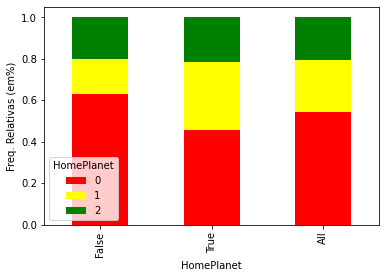

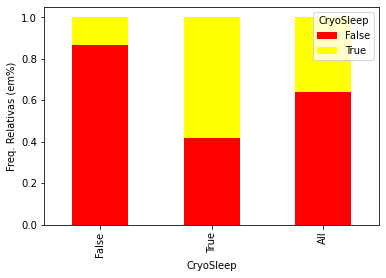

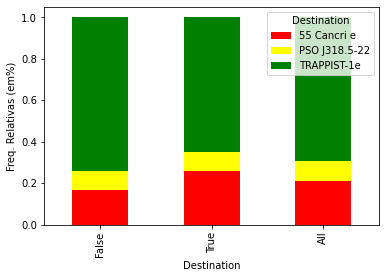

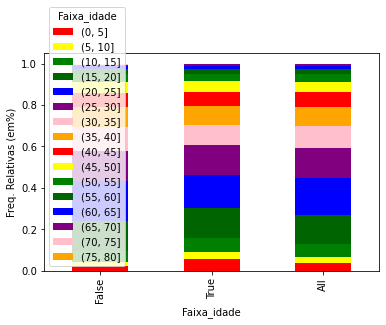

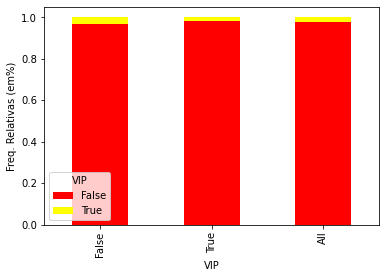

In [15]:
lista=["HomePlanet",'CryoSleep','Destination','Faixa_idade','VIP']
cores = ['red','yellow','green','darkgreen','blue','purple','pink','orange']
n=0
#seria bom fazer uma figura
for i in lista:
    Transported_x_y=pd.crosstab(df['Transported'], df[i], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

# Analize das informações:


# Manipulando dados

In [16]:
BINS= int(np.sqrt(len(df_sliced.index)))
df.hist(bins=BINS,figsize=(15,10));

NameError: name 'df_sliced' is not defined

# Separando Treino e Teste

In [ ]:
Xpassanger=df.loc[:"Transported"]
ypassanger=df.drop(["Transported"],axis=1)

In [ ]:
X_trainpassanger, X_testpassanger, y_trainpassanger, y_testpassanger = train_test_split(
    Xpassanger,
    ypassanger,                  
    test_size=0.3,
    random_state=RAND_SEED,
)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_trainpassanger)

ValueError: could not convert string to float: 'B/120/S'

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

for name, model in classification_models:
  result = cross_val_score(model, X, y, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))


NameError: name 'X' is not defined